#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (11, 6)

import warnings
warnings.filterwarnings('ignore')

#### Load the data

In [2]:
df = pd.read_csv('DATA/kc_house_data.csv')

In [3]:
#preview the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#check the general structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We have 21 columns, with 21597 rows

In [5]:
#check the datatypes in the dataset
df.dtypes.value_counts().to_frame()

,count
int64,15
float64,5
object,1


All columns except fo date are numerical. We will need to convert the date to datetype later

In [6]:
#check for misssing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

we dont have missing values

#### check the statistcal summary of the data

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


#### Check the distribution of the label

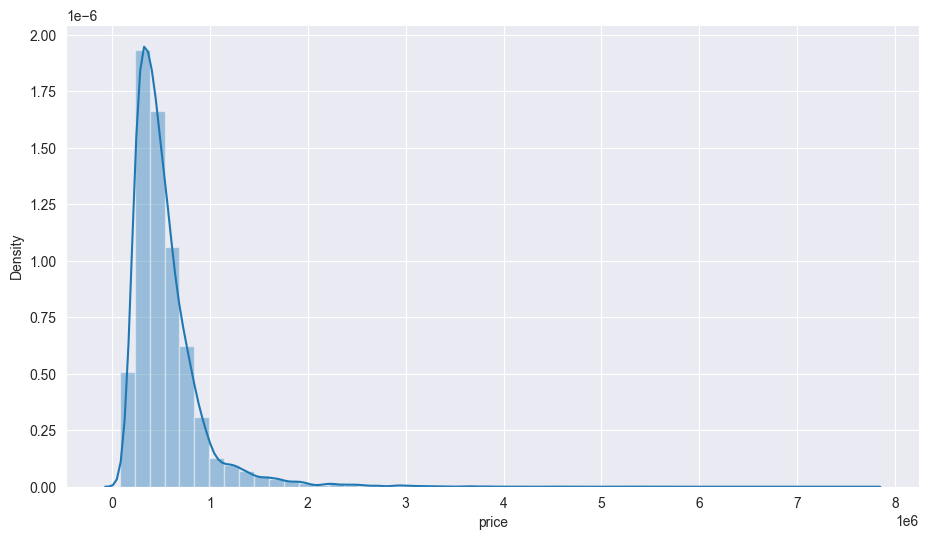

In [8]:
sns.distplot(df['price']);

Most house prices are between 0 and 2000000, we however have some outliers with prices above 2000000

Check the distribution of bedroom in the sold houses

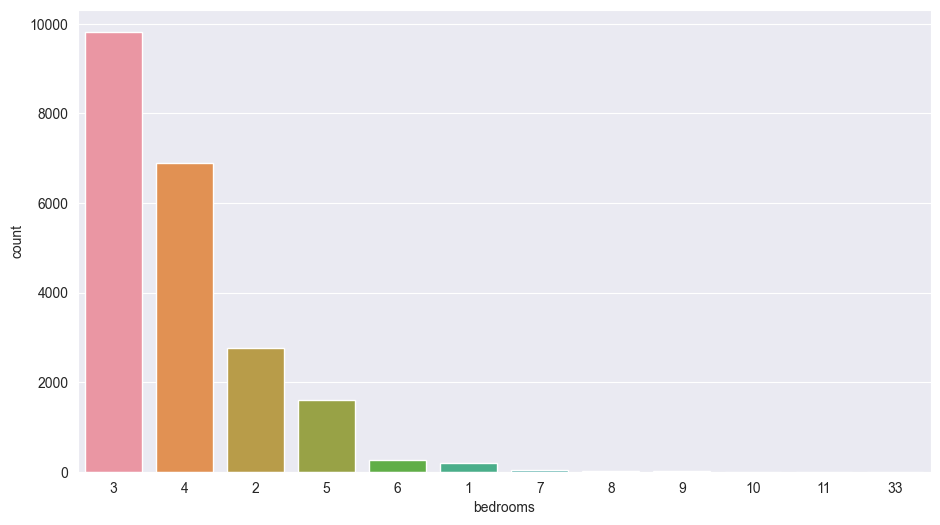

In [9]:
# df['bedrooms'].value_counts().plot(kind='bar');
sns.countplot(x='bedrooms', data=df, order=df['bedrooms'].value_counts().index);

* The most common number of bedrooms in the dataset is 3, followed by 4 and 2.<br>
* There is a decreasing trend in the occurrence of houses as the number of bedrooms increases beyond 5.<br>
* Houses with a higher number of bedrooms (5, 6, 7, 8, 9, 10, 11, and 33) are less common in the dataset.<br>
* There are only a few occurrences of houses with a very small number of bedrooms (1) or a large number of bedrooms (11 and 33), indicating that they are relatively rare cases.<br>

#### create a correlation matrix in relation to price

In [10]:
#onvert date from object to datetime
df['date'] = pd.to_datetime(df['date'])
df.corr()['price']

id              -0.016772
date            -0.003998
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

#### create a bar chart to represent this

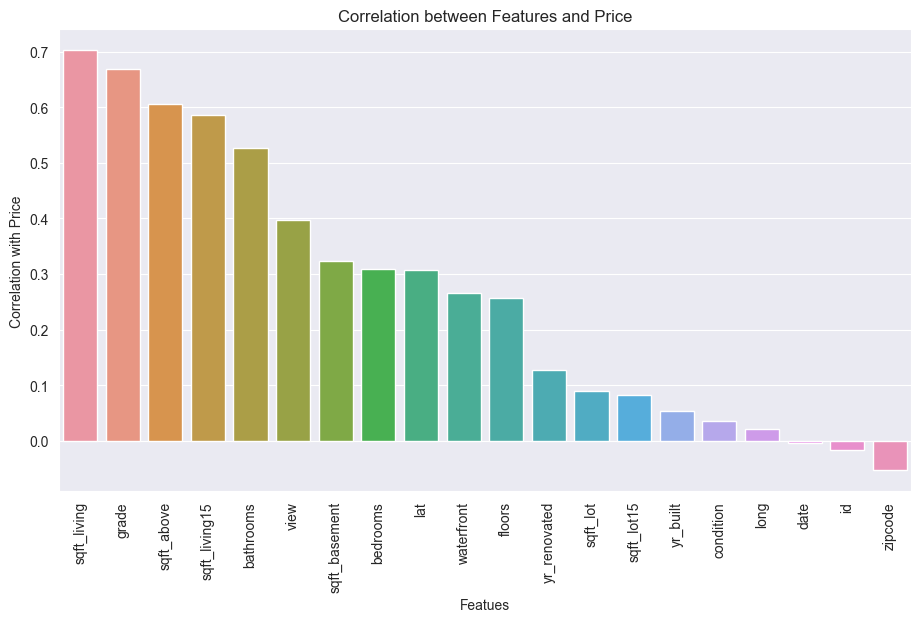

In [11]:
correlation = df.corr()['price']
correlation = correlation[correlation.index != 'price']
correlation_sorted = correlation.sort_values(ascending=False)
# Create a bar chart using seaborn
sns.barplot(x=correlation_sorted.index, y=correlation_sorted.values)

# Set labels and title
plt.xlabel('Featues')
plt.ylabel('Correlation with Price')
plt.title('Correlation between Features and Price')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=90);

The strongest positive correlations with the 'price' are observed for 'sqft_living', 'bathrooms', and 'grade'. Houses with more bedrooms, more floors, better views, larger basements, and located in areas with higher latitudes tend to have moderately positive correlations with the 'price'. On the other hand, there are very weak negative correlations for 'id', 'date', 'zipcode', 'long', and 'sqft_lot15', indicating minimal associations with the 'price'. Finally, the 'condition' and 'yr_built' columns exhibit very weak correlations with the 'price'.

#### Investigate the distribution of prices per the number of bedrooms

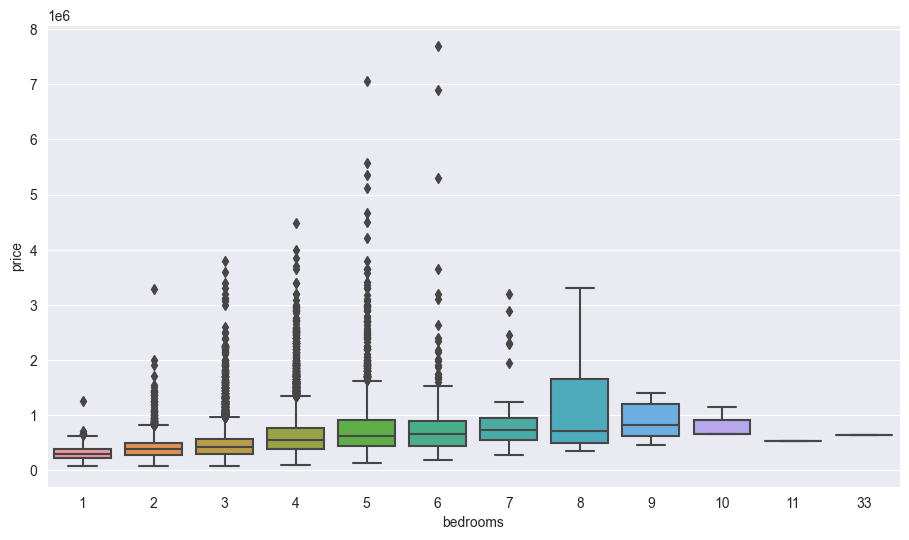

In [12]:
sns.boxplot(x='bedrooms', y='price', data=df);

Most house prices are typically between 0 to 2 million. Prices beyonf this are noted t be outliers

#### Distribution of prices in terms of longitude and latitude

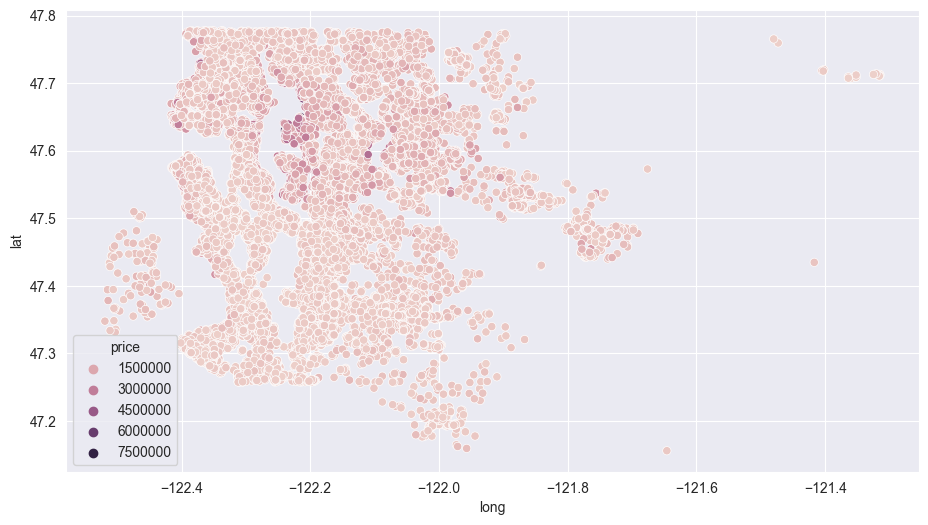

In [13]:
sns.scatterplot(x='long', y='lat', data=df, hue='price');

The color distribution doesnt seem to be great  due to outliers. we will go ahead and cut out the top 1% values in terms of pricing

In [14]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,2014-10-20,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,2014-06-18,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


#### get the length of the dataset that is represented by 1% of the data

In [15]:
len(df)*0.01

215.97

#### sample out top 1% houses to remoe outliers

In [16]:
bottom_99_perc = df.sort_values('price', ascending=False).iloc[216:]

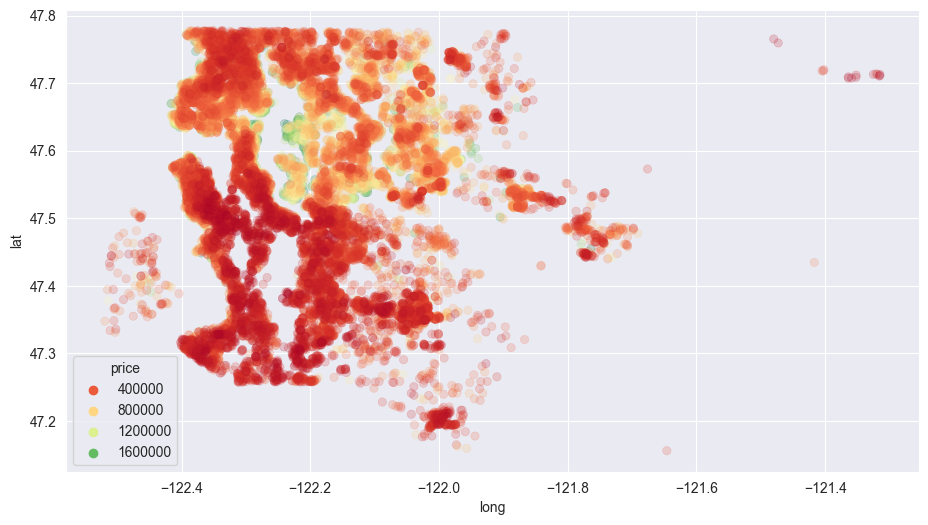

In [17]:
sns.scatterplot(x='long', y='lat', data=bottom_99_perc, edgecolor=None, alpha=0.2,palette='RdYlGn',hue='price');

Houses with waterfronts seem to be more expensive

#### Feature Engineering

In [18]:
#drop the id column
df = df.drop('id', axis=1)

In [19]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:
#create a new colum year from the date column

df['year'] = df['date'].apply(lambda x: x.year)

In [21]:
#create a new colum month from the date column
df['month'] = df['date'].apply(lambda x: x.month)

In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


#### check price distribution per month

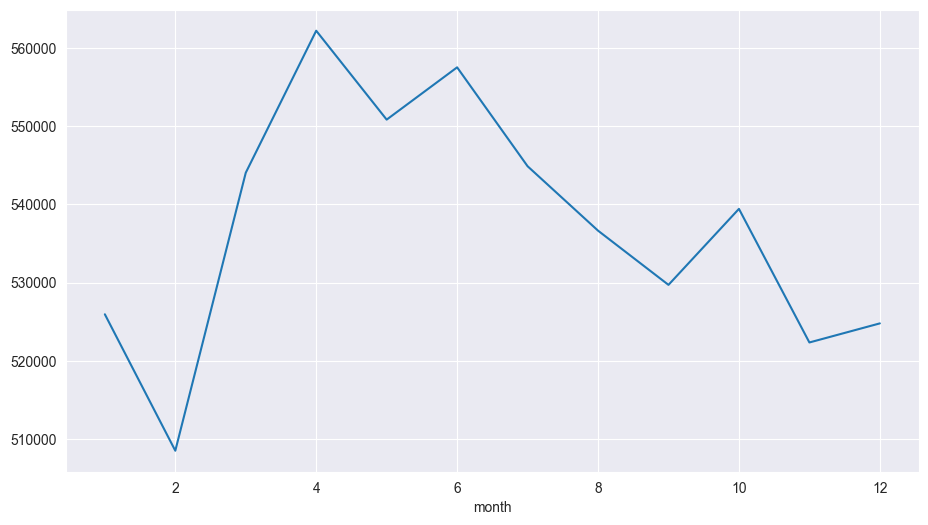

In [23]:
df.groupby('month').mean()['price'].plot();

There isnt much variation in price across the months 

#### check price distribution per year

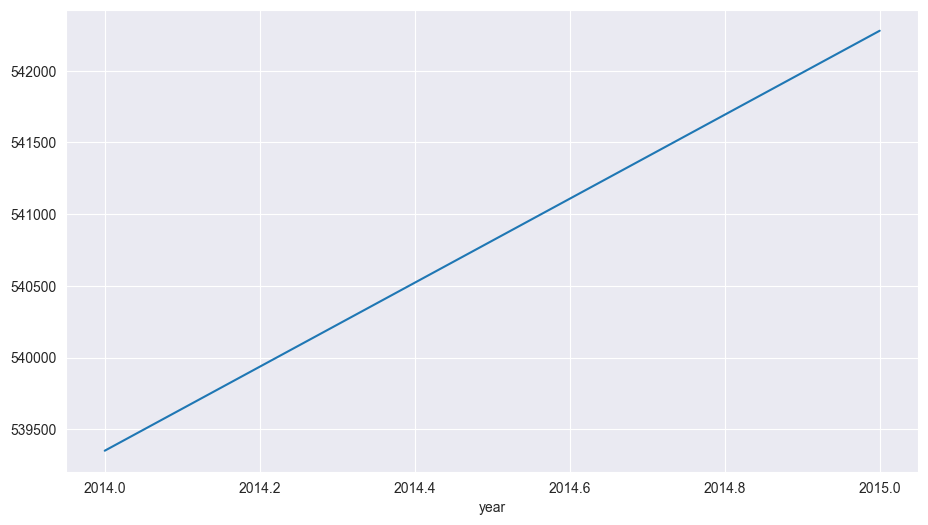

In [24]:
df.groupby('year').mean()['price'].plot();

There is an increase in house price as time goes by in terms of years

#### Drop the date, zipcode columns

In [25]:
df = df.drop('date', axis=1)

In [26]:
#drop the zipcode column
df = df.drop('zipcode', axis=1)

In [27]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


#### Separate features from label

In [28]:
y = df['price'].values
X = df.drop('price', axis=1).values

#### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### scale the data

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

#### Modeling

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [38]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 276202684416.0000 - val_loss: 196350918656.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 148116275200.0000 - val_loss: 104873385984.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 102079578112.0000 - val_loss: 95388827648.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 98055995392.0000 - val_loss: 94033616896.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 96514097152.0000 - val_loss: 92617015296.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 94968717312.0000 - val_loss: 91080204288.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 93383852032.0000 - val_loss: 89509855232.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 91560574976.0000 - val_loss: 87634558976.0000
Epoch 9/400
119/119 [======

119/119 [==============================] - 0s 1ms/step - loss: 38569132032.0000 - val_loss: 37423878144.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 38438821888.0000 - val_loss: 37390336000.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 38336180224.0000 - val_loss: 37244260352.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 38220611584.0000 - val_loss: 37134155776.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 38120329216.0000 - val_loss: 37046341632.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 38072115200.0000 - val_loss: 36943085568.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 37970763776.0000 - val_loss: 36856422400.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 37865787392.0000 - val_loss: 36761952256.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 34329430016.0000 - val_loss: 33118343168.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 34248990720.0000 - val_loss: 33038886912.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 34246727680.0000 - val_loss: 32995803136.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 34203430912.0000 - val_loss: 32969306112.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 34178867200.0000 - val_loss: 32964458496.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 34104141824.0000 - val_loss: 32874385408.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 34102231040.0000 - val_loss: 32832690176.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 34028187648.0000 - val_loss: 32802035712.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 32485038080.0000 - val_loss: 30874337280.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 32439683072.0000 - val_loss: 30912423936.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 32389775360.0000 - val_loss: 30878025728.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 32365301760.0000 - val_loss: 30835718144.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 32334290944.0000 - val_loss: 30797228032.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 32318607360.0000 - val_loss: 30772357120.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 32303048704.0000 - val_loss: 30750111744.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 32316866560.0000 - val_loss: 30771304448.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 31483938816.0000 - val_loss: 29608888320.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 31491028992.0000 - val_loss: 29600964608.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 31432314880.0000 - val_loss: 29596323840.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 31427375104.0000 - val_loss: 29579436032.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 31424712704.0000 - val_loss: 29597331456.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 31520407552.0000 - val_loss: 29641539584.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 31400941568.0000 - val_loss: 29562798080.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 31403696128.0000 - val_loss: 29595854848.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 30924904448.0000 - val_loss: 28921356288.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 30993098752.0000 - val_loss: 28925517824.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 30929197056.0000 - val_loss: 29015011328.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 30935644160.0000 - val_loss: 28909103104.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 30896773120.0000 - val_loss: 28901294080.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 30974369792.0000 - val_loss: 28946558976.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 30907142144.0000 - val_loss: 28961273856.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 30897430528.0000 - val_loss: 28864688128.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 30583980032.0000 - val_loss: 28462790656.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 30582452224.0000 - val_loss: 28424742912.0000


#### Model Evaluation<br>
* Get the history of model's losses<br>
* Get the rmse

In [41]:
losses = pd.DataFrame(model.history.history)

<Axes: >

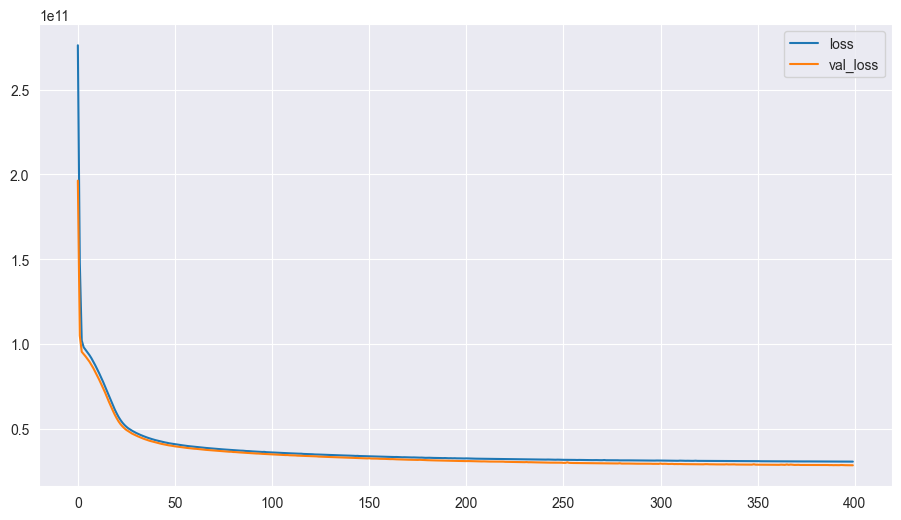

In [42]:
losses.plot()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [46]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 854us/step


In [48]:
print("rmse:", mean_squared_error(y_test, predictions, squared=False))
print("mae:", mean_absolute_error(y_test,predictions))
print("variance:", explained_variance_score(y_test,predictions))

rmse: 168596.41484417036
mae: 104382.74682677469
variance: 0.7856627600587034


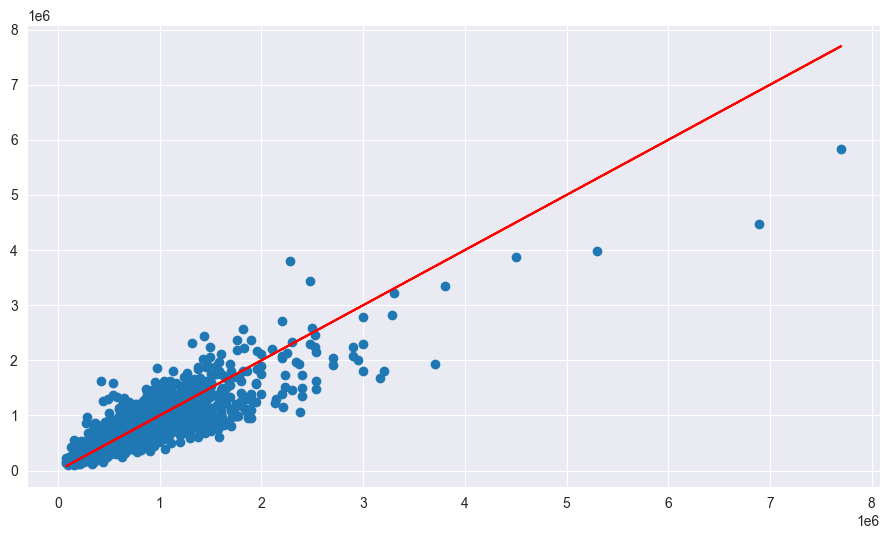

In [52]:
plt.scatter(y_test, predictions);
plt.plot(y_test, y_test, 'r');

#### Make Predictions

In [53]:
single_house = df.drop('price', axis=1).iloc[0]

In [56]:
#scale the data
scaler.transform(single_house.values.reshape(-1,19))

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])